# Dataset

In [5]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from matplotlib.pyplot import specgram

In [6]:
N_train = 10
N_class = 10

SAMPLE_RATE = 22050
T = 4.0
t = np.linspace(0, T, int(T * SAMPLE_RATE), endpoint=False)
NUM_SAMPLES = int(SAMPLE_RATE * T)

BINS_OCTAVE = 12 * 2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES

In [7]:
# Sample data
def mel_spec(y):
    Q = librosa.cqt(y=y, sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE, n_bins=NUM_BINS)
    Q_db = librosa.amplitude_to_db(Q, ref=np.max)
    return Q_db

freq = 440
signal = np.sin(2 * np.pi * freq * t)
train = signal[np.newaxis, :]
song = train[0]
test_spec = mel_spec(song)
print (test_spec.shape)
FEATS = test_spec.shape[0]
FRAMES = test_spec.shape[1]

(168L, 173L)


c:\python27\lib\site-packages\librosa\core\spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [8]:
# Load data

# X_train = train[:, :]
# y_train = train[:, -1]
# y_train = y_train.reshape(1, 1)

X_train = np.empty((0, NUM_SAMPLES))
y_train = np.empty((0, 1), dtype=int)
with open('train.csv', 'rb') as f:
    reader = csv.reader(f)
    counter = 0
    for row in reader:
        new_x = np.array(row[:-1])
        new_x = new_x.astype(np.float)
        new_y = np.array(float(row[-1]))
        new_y = new_y.astype(int)
        X_train = np.vstack((X_train, new_x))
        y_train = np.append(y_train, new_y)
        counter += 1
        if counter >= N_train:
            break
print X_train
print y_train

[[-0.04662734 -0.05366122 -0.01660576 ... -0.03615379 -0.03697921
  -0.02756698]
 [ 0.          0.00071228  0.00142399 ... -0.00213454 -0.00142399
  -0.00071228]
 [ 0.01519834  0.02805315  0.02753192 ... -0.0135207  -0.00888727
  -0.00353067]
 ...
 [ 0.00437637  0.01397753  0.0192319  ... -0.03001045 -0.02469055
  -0.01838077]
 [ 0.03821736  0.08498381  0.09341098 ... -0.01643582 -0.01112579
  -0.00470509]
 [ 0.          0.00071228  0.00142399 ... -0.00213454 -0.00142399
  -0.00071228]]
[5 0 8 8 5 0 4 9 9 0]


In [5]:
def plot_mel(raw_sounds):
    fig = plt.figure(figsize=(30, 30), dpi=150)
    for i in range(len(raw_sounds)):
        plt.subplot(10, 1, i + 1)
        librosa.display.specshow(mel_spec(X_train[i]), y_axis='hz')

    plt.suptitle("Figure 1: Waveplot", x=0.5, y=0.915, fontsize=18)
    plt.show()

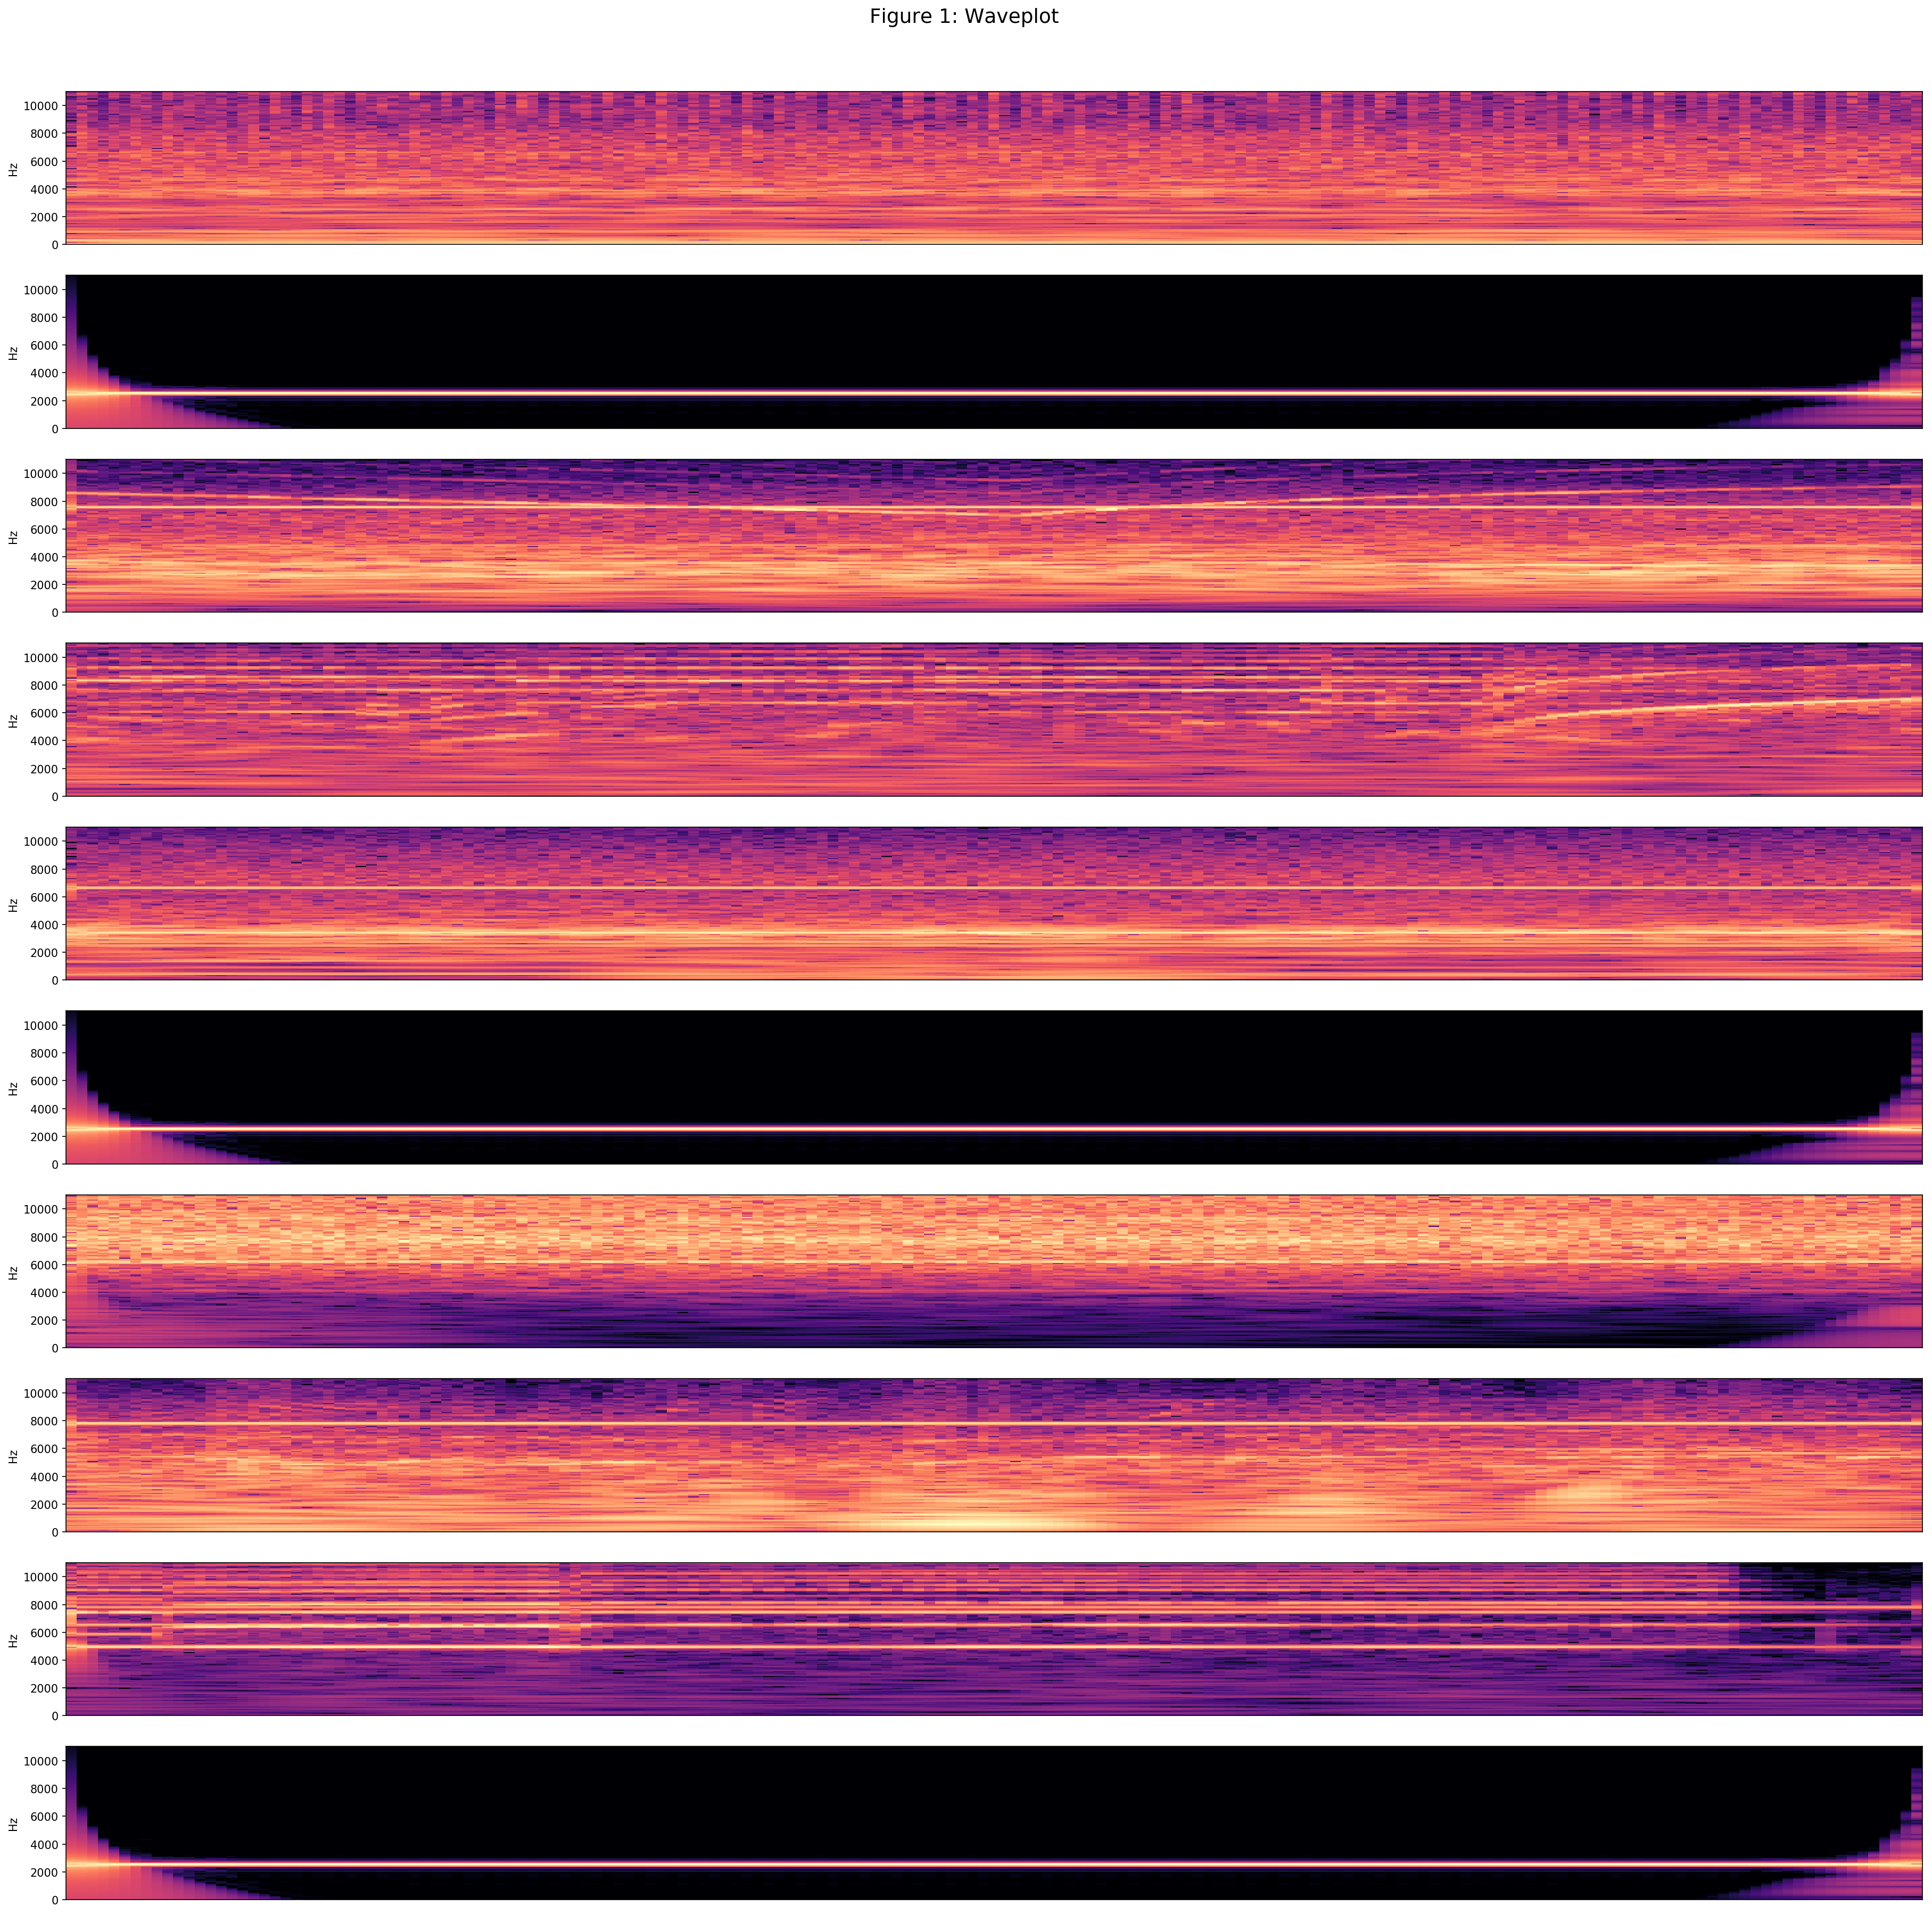

In [6]:
plot_mel(X_train)

def plot_waves(raw_sounds):
    fig = plt.figure(figsize=(30, 30), dpi=150)
    for i in range(1, len(raw_sounds)):
        plt.subplot(10, 1, i)
        librosa.display.waveplot(raw_sounds[i])

    plt.suptitle("Figure 1: Waveplot", x=0.5, y=0.915, fontsize=18)
    plt.show()

In [7]:
def plot_waves(raw_sounds):
    fig = plt.figure(figsize=(30, 30), dpi=150)
    for i in range(len(raw_sounds)):
        plt.subplot(10, 1, i + 1)
        librosa.display.waveplot(np.array(f),sr=SAMPLE_RATE)
        
    plt.suptitle("Figure 2: Spectrogram", x=0.5, y=0.915, fontsize=18)
    plt.show()

ParameterError: data must be floating-point

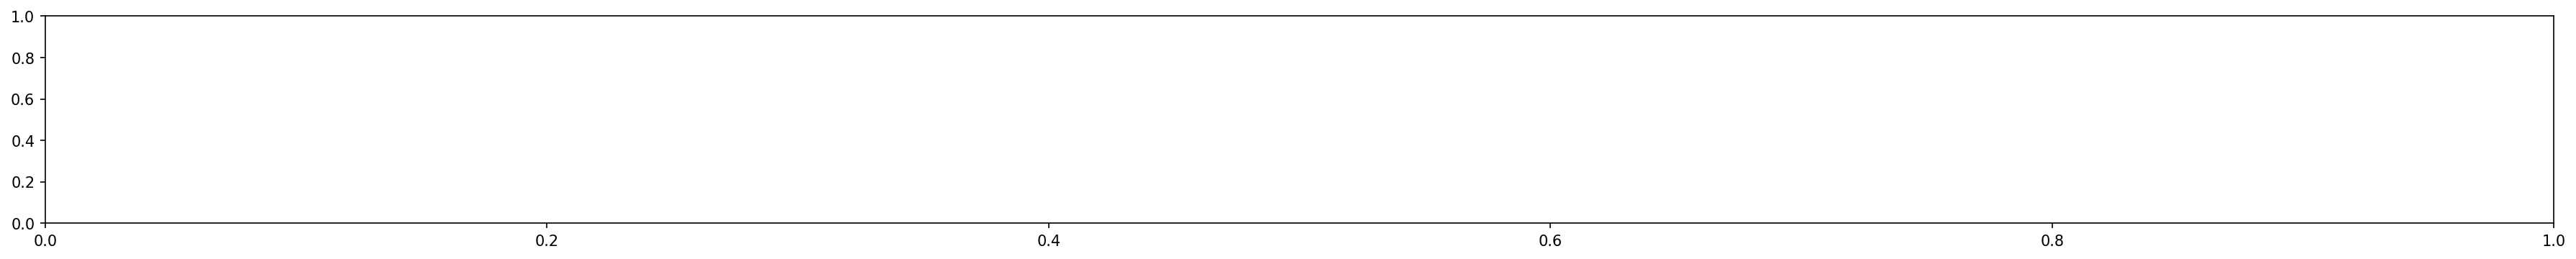

In [8]:
plot_waves(X_train)

In [25]:
def plot_specgram(raw_sounds):
    fig = plt.figure(figsize=(30, 30), dpi=150)
    for i in range(len(raw_sounds)):
        plt.subplot(10, 1, i + 1)
        specgram(np.array(raw_sounds[i]), Fs=SAMPLE_RATE)
        
    plt.suptitle("Figure 2: Spectrogram", x=0.5, y=0.915, fontsize=18)
    plt.show()

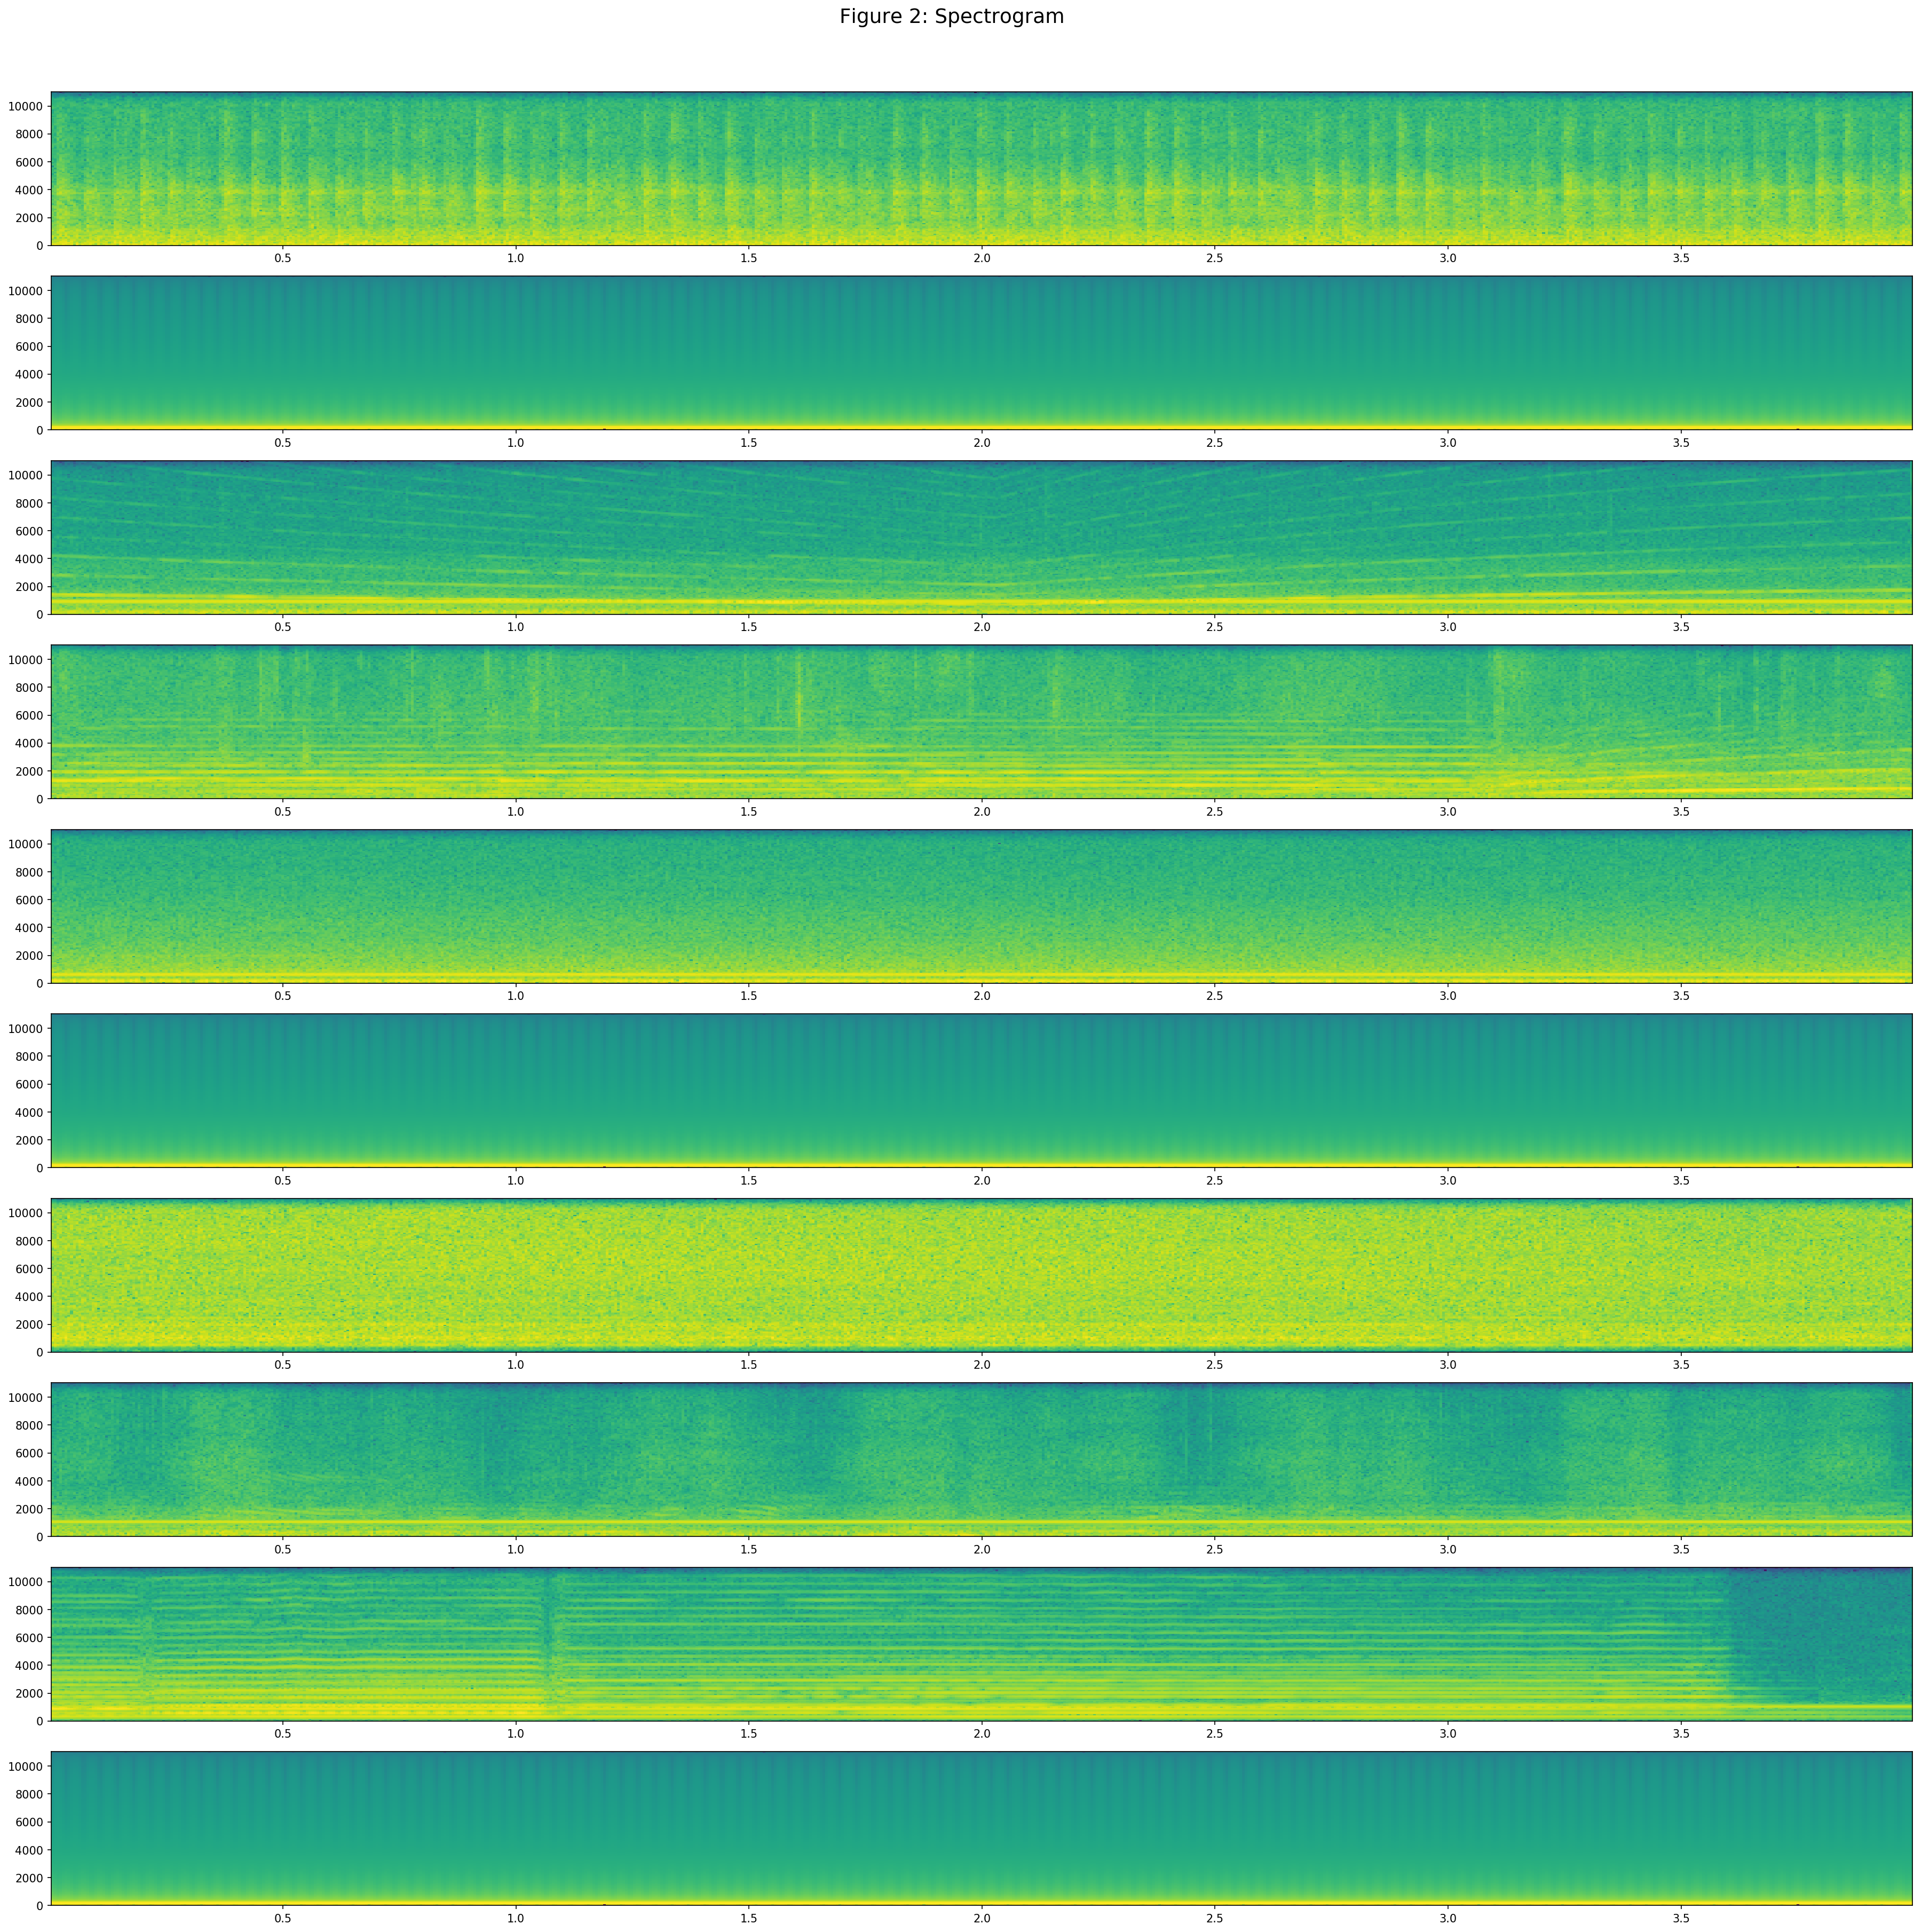

In [26]:
plot_specgram(X_train)

# Feature Extraction

In [9]:
def _extract_feature(X, sample_rate=SAMPLE_RATE):
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0)
    return mfccs, chroma, mel, contrast, tonnetz

In [10]:
N_train = 50

X_train = np.empty((0, 193))
y_train = np.empty((0, 1), dtype=int)
with open('train.csv', 'rb') as f:
    reader = csv.reader(f)
    counter = 0
    for row in reader:
        new_x = np.array(row[:-1])
        new_x = new_x.astype(np.float)
        mfccs, chroma, mel, contrast, tonnetz = _extract_feature(new_x)
        new_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
        X_train = np.vstack([X_train, new_features])
        
        new_y = np.array(float(row[-1]))
        new_y = new_y.astype(int)
        y_train = np.append(y_train, new_y)
        counter += 1
        if counter >= N_train:
            break
print X_train.shape
print y_train.shape

c:\python27\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


(50L, 193L)
(50L,)


In [3]:
tmp_y = y_train
y_train = np.zeros((len(tmp_y), N_class))
y_train[np.arange(len(tmp_y)), tmp_y] = 1

NameError: name 'y_train' is not defined

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
MAX_DEPTH = 40
N_ESTIMATORS = 10

In [13]:
RF = RandomForestClassifier(class_weight='balanced', n_jobs=-1, max_depth=MAX_DEPTH, n_estimators=N_ESTIMATORS)
RF.fit(X_train, y_train)
train_score = RF.score(X_train, y_train)

In [15]:
print train_score

1.0


# Predict

In [16]:
N_test = 50

X_test = np.empty((0, 193))
with open('test.csv', 'rb') as f:
    reader = csv.reader(f)
    counter = 0
    for row in reader:
        new_x = np.array(row[:-1])
        new_x = new_x.astype(np.float)
        mfccs, chroma, mel, contrast, tonnetz = _extract_feature(new_x)
        new_features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
        X_test = np.vstack([X_test, new_features])
        
        counter += 1
        if counter >= N_test:
            break
print X_test.shape

(50L, 193L)


In [19]:
y_hat = RF.predict(X_train)

In [22]:
print y_hat

[5 0 8 8 5 0 4 9 9 0 9 2 9 0 8 5 0 9 7 0 0 0 7 9 5 9 0 7 0 2 9 8 9 5 0 2 5
 8 9 0 9 7 0 9 0 3 0 7 7 0]


In [23]:
print y_train

[5 0 8 8 5 0 4 9 9 0 9 2 9 0 8 5 0 9 7 0 0 0 7 9 5 9 0 7 0 2 9 8 9 5 0 2 5
 8 9 0 9 7 0 9 0 3 0 7 7 0]


In [52]:
X = numpy.array([[1, 2, 4, 5]])
y = numpy.array([[0, 1]])
RF = RandomForestClassifier(class_weight='balanced', n_jobs=-1, max_depth=10, n_estimators=10)
RF.fit(X, y)
train_score = RF.score(X, y)
print train_score

1.0


In [57]:
X_test = numpy.array([[10, 3, 7, 6]])
RF.predict(X_test)

array([[0., 1.]])